## Logistic Regression: Email Spam or Ham.

Goals: Describe how did you find the optimum threshold value using accuracy, sensitivity and specificity.

How did you optimise your model.

Plot ROC, find the key measures of classification, print confusion matrix.

Importing the libraries required for the whole process:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [2]:
email_df= pd.read_csv("C:\\Users\\pavik\\Documents\\teksands_assignment_ml\\logistic regression project\\spam_ham_dataset\\spam_ham_dataset.csv")

In [3]:
email_df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
print("Shape of email_df:"+str(email_df.shape))

Shape of email_df:(5171, 4)


In [5]:
print("column names  of email_df:\n"+str(email_df.columns))

column names  of email_df:
Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


### Data preprocessing

In [7]:
print("Presence of null values in email_df:\n"+ "\n"+str( email_df.isnull().sum()))

Presence of null values in email_df:

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [8]:
print("presence of duplicated  rows in email_df:"+str(email_df.duplicated().sum()))

presence of duplicated  rows in email_df:0


#### Removing Unnecessary column

In [9]:
email_df.drop(['Unnamed: 0',"label"], axis=1, inplace = True)

In [10]:
email_df.rename(columns={ 'label_num':'spam/ham'}, inplace=True)
email_df.head()

,text,spam/ham
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


### Univariant analysis:

0    3672
1    1499
Name: spam/ham, dtype: int64




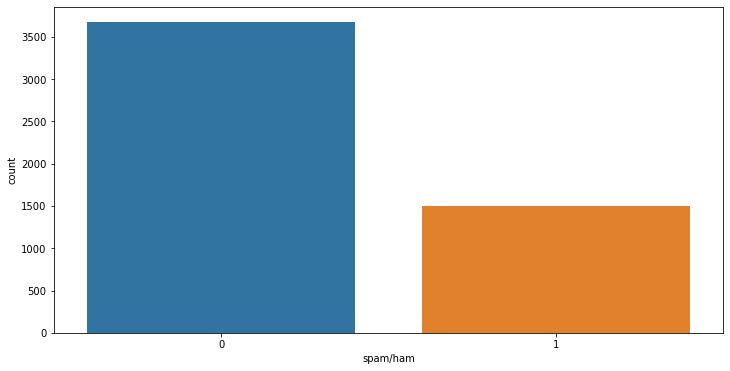

In [11]:
# Barplot describes the count of the class labels
print(email_df['spam/ham'].value_counts())
print("\n")
plt.figure(figsize = (12, 6))
sns.countplot(data =email_df, x = 'spam/ham');

In [12]:
email_df.groupby('spam/ham').describe()

text                                                               
         count unique                                                top freq
spam/ham                                                                     
0         3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
1         1499   1462                                      Subject: \r\n   16

In [13]:
email_copy = email_df['text'].copy()

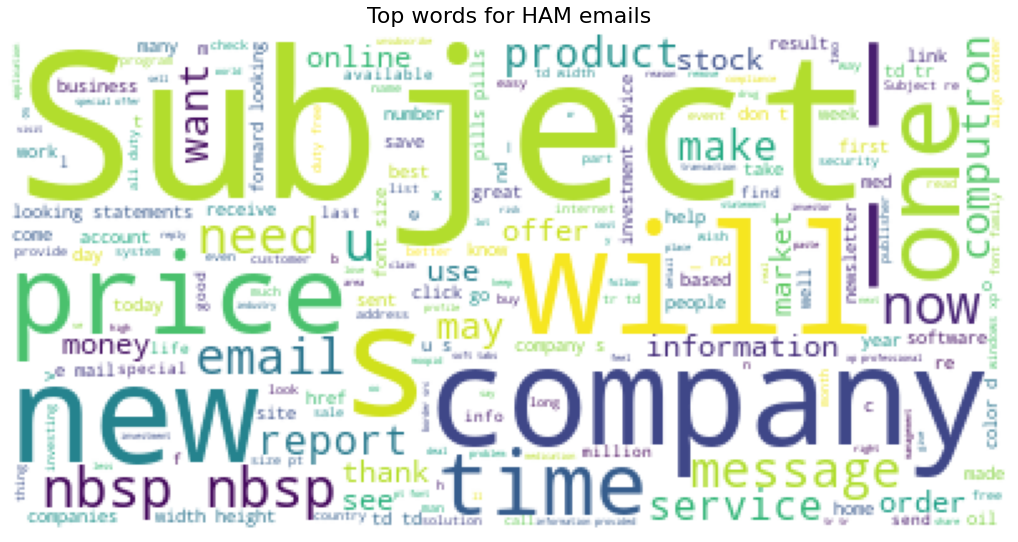

In [14]:
wc = WordCloud(
    background_color='white', 
    max_words=200)

wc.generate(' '.join(text for text in email_df.loc[email_df['spam/ham'] == 1, 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for HAM emails', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

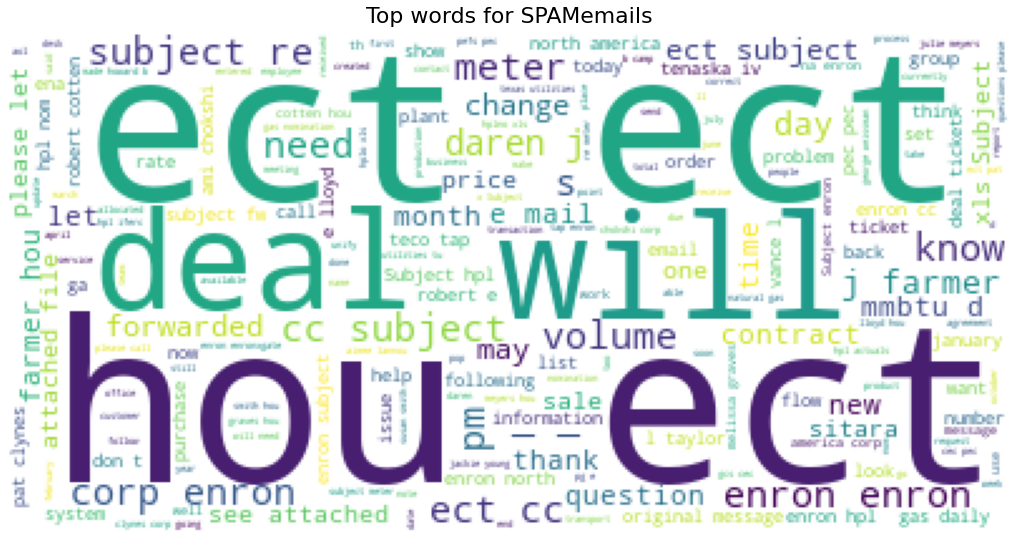

In [15]:
wc = WordCloud(
    background_color='white', 
    max_words=200)

wc.generate(' '.join(text for text in email_df.loc[email_df['spam/ham'] == 0, 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for SPAMemails', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [16]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(email_df)):
    review = re.sub('[^a-zA-Z]', ' ',email_df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [18]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [19]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
y=email_df["spam/ham"]

In [20]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
# model
Spam_model = LogisticRegression()
Spam_model.fit(X_train, y_train)
y_train_pred = Spam_model.predict(X_train)

In [23]:
print("accuracy of the logistic regression  model:   " + str(accuracy_score(y_train,y_train_pred)))

accuracy of the logistic regression  model:   0.9970986460348162


<AxesSubplot:>

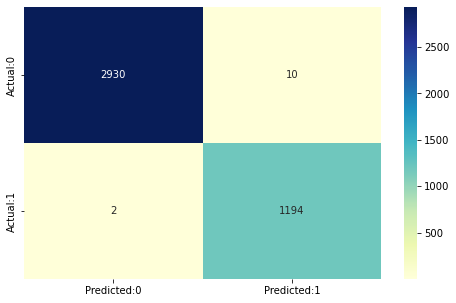

In [24]:
# Create the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_train_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### for the calculation of specificity and Sensitivity

In [25]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [26]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n')


The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9970986460348162 

 Missclassifications = 1-Accuracy =  0.0029013539651837617 

 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.9983277591973244 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.9965986394557823 



[[9.99880642e-01 1.19357911e-04]
 [9.99999006e-01 9.94206606e-07]
 [9.83843267e-01 1.61567325e-02]
 ...
 [5.03392120e-07 9.99999497e-01]
 [1.00000000e+00 1.60851686e-11]
 [9.99999991e-01 8.57897791e-09]]
Logistic: ROC AUC = 1.000


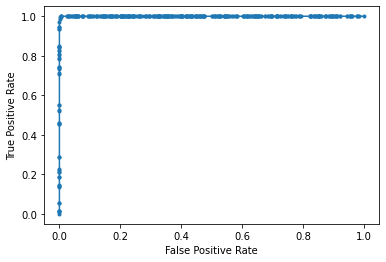

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
lr_probs = Spam_model.predict_proba(X_train)
print(lr_probs)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)

# summarize scores
print('Logistic: ROC AUC = %.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [28]:
pd.DataFrame(zip(lr_fpr, lr_tpr), columns=('FPR', 'TPR'))

,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.011706
2,0.000000,0.013378
3,0.000000,0.014214
4,0.000000,0.015886
...,...,...
398,0.976190,1.000000
399,0.976871,1.000000
400,0.982313,1.000000
401,0.982993,1.000000


In [29]:
y_train_pred_final = pd.DataFrame({"spam/ham":y_train.values,"pred_spam/ham":lr_probs})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head(20)

,spam/ham,pred_spam/ham,index
0,0,1.193579e-04,3628
1,0,9.942066e-07,2491
2,0,1.615673e-02,3262
3,0,5.700499e-05,2972
4,1,8.867720e-01,2481
5,0,4.870552e-06,2778
6,0,6.131294e-04,1559
7,0,2.337809e-07,3126
8,1,9.734284e-01,3787
9,0,2.869305e-04,3616


#### Creating new column 'predicted' with `1 if Churn_Prob > 0.5 else 0`

In [30]:
y_train_pred_final['predicted'] = y_train_pred_final["pred_spam/ham"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,spam/ham,pred_spam/ham,index,predicted
0,0,1.193579e-04,3628,0
1,0,9.942066e-07,2491,0
2,0,1.615673e-02,3262,0
3,0,5.700499e-05,2972,0
4,1,8.867720e-01,2481,1


In [31]:
from sklearn import metrics
# Create Confusion matrix 
cm1= metrics.confusion_matrix(y_train_pred_final["spam/ham"], y_train_pred_final['predicted']  )
print(cm1)

[[2930   10]
 [   2 1194]]


<AxesSubplot:>

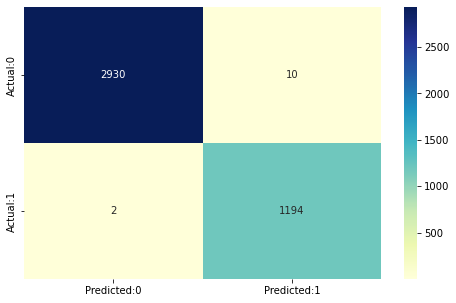

In [32]:
# Create the Confusion Matrix 
conf_matrix = pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### Is our probability threshold of 0.5 good? Finding Optimal Cutoff Point...
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [33]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
     y_train_pred_final[i]= y_train_pred_final["pred_spam/ham"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,spam/ham,pred_spam/ham,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.193579e-04,3628,0,1,0,0,0,0,0,0,0,0,0
1,0,9.942066e-07,2491,0,1,0,0,0,0,0,0,0,0,0
2,0,1.615673e-02,3262,0,1,0,0,0,0,0,0,0,0,0
3,0,5.700499e-05,2972,0,1,0,0,0,0,0,0,0,0,0
4,1,8.867720e-01,2481,1,1,1,1,1,1,1,1,1,1,0


In [34]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

ROC CURVE - ROC (Receiver Operator Characteristic Curve) can help in deciding the best threshold value. A ROC curve is plotted with FPR on the X-axis and TPR on the y-axis. A high threshold value gives - high specificity and low sensitivity A low threshold value gives - low specificity and high sensitivity

In [35]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["spam/ham"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.289168  1.000000  0.000000
0.1   0.1  0.972437  1.000000  0.961224
0.2   0.2  0.987669  1.000000  0.982653
0.3   0.3  0.993956  1.000000  0.991497
0.4   0.4  0.996373  0.999164  0.995238
0.5   0.5  0.997099  0.998328  0.996599
0.6   0.6  0.998791  0.998328  0.998980
0.7   0.7  0.999033  0.998328  0.999320
0.8   0.8  0.991296  0.969900  1.000000
0.9   0.9  0.970019  0.896321  1.000000


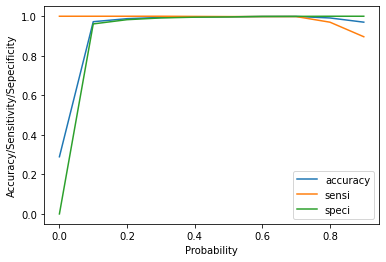

In [36]:
### Plot `accuracy - sensitivity - specificity` against various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlabel('Probability')
plt.ylabel('Accuracy/Sensitivity/Sepecificity')
plt.show()

#### From the plot above, probability threshold of about `0.7` appears to be optimum

In [37]:
y_train_pred_final['final_predicted'] =  y_train_pred_final["pred_spam/ham"].map(lambda x: 1 if x > 0.7 else 0)
y_train_pred_final.head()

,spam/ham,pred_spam/ham,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.193579e-04,3628,0,1,0,0,0,0,0,0,0,0,0,0
1,0,9.942066e-07,2491,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1.615673e-02,3262,0,1,0,0,0,0,0,0,0,0,0,0
3,0,5.700499e-05,2972,0,1,0,0,0,0,0,0,0,0,0,0
4,1,8.867720e-01,2481,1,1,1,1,1,1,1,1,1,1,0,1


In [38]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final["spam/ham"], y_train_pred_final["final_predicted"])

0.9990328820116054

<AxesSubplot:>

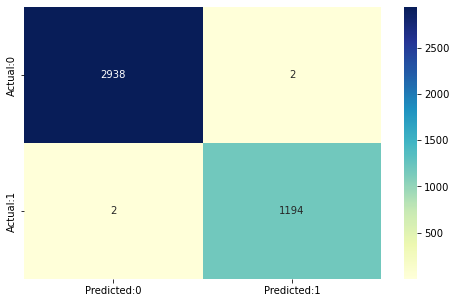

In [39]:
cm2= metrics.confusion_matrix(y_train_pred_final["spam/ham"], y_train_pred_final["final_predicted"])
conf_matrix = pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [40]:
TN=cm2[0,0]
TP=cm2[1,1]
FN=cm2[1,0]
FP=cm2[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [41]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n')


The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9990328820116054 

 Missclassifications = 1-Accuracy =  0.0009671179883945502 

 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.9983277591973244 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.9993197278911564 



### predict for test dataset

In [42]:
y_test_pred = Spam_model .predict(X_test)

In [43]:
list(zip(y_test_pred[:10], y_test[:10]))

[(0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1)]

In [44]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [45]:
# Let's see the head
y_pred_1.head()

,0
0,0
1,0
2,0
3,1
4,0


In [46]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [47]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [48]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [49]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [50]:
# Renaming the column 
lr_probs_test =  Spam_model.predict_proba(X_test)
lr_probs_test = lr_probs_test[:, 1]
y_pred_final['spam\ham_pred'] = lr_probs_test

In [51]:
lr_probs_test

array([9.39390418e-02, 1.35760565e-15, 9.49127681e-06, ...,
       5.92758531e-07, 9.52009026e-01, 2.79289314e-14])

In [52]:
# Let's see the head of y_pred_final
y_pred_final.head()

,spam/ham,CustID,0,spam\ham_pred
0,0,1789,0,9.393904e-02
1,0,2277,0,1.357606e-15
2,0,2618,0,9.491277e-06
3,1,3144,1,8.190607e-01
4,0,3756,0,1.103860e-04


In [53]:
y_pred_final['final_predicted'] = y_pred_final["spam\ham_pred"].map(lambda x: 1 if x > 0.7 else 0)

In [54]:
y_pred_final.head()

,spam/ham,CustID,0,spam\ham_pred,final_predicted
0,0,1789,0,9.393904e-02,0
1,0,2277,0,1.357606e-15,0
2,0,2618,0,9.491277e-06,0
3,1,3144,1,8.190607e-01,1
4,0,3756,0,1.103860e-04,0


In [55]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final["spam/ham"], y_pred_final["final_predicted"])

0.9777777777777777

<AxesSubplot:>

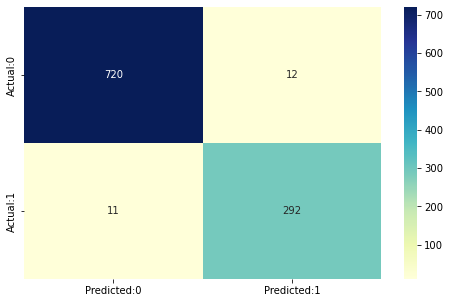

In [56]:
cm3 = metrics.confusion_matrix(y_pred_final["spam/ham"], y_pred_final["final_predicted"])
conf_matrix = pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [57]:
TN=cm3[0,0]
TP=cm3[1,1]
FN=cm3[1,0]
FP=cm3[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [58]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n')


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9777777777777777 

 Missclassifications = 1-Accuracy =  0.022222222222222254 

 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.9636963696369637 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.9836065573770492 



conclusion:
In case of Spam mail Detection, we will more focus of False Possitives. This is so because, In case of False-Possitive the model will predict the unspam mail as a spam which results in loss of some useful data. If the ham mail that was recognised as spam contain any important information, it will not be reached to the user.¶